### Importing dependencies and necessary packages

In [1]:
from modelsDEA import DEA
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

from utils.is_efficient import is_efficient
from utils import arr2matrix, initializeUnif, df2latex, handle_commas, round_elements, plot, plot3d, plotwithfrontier, perpendicular_distance, extend_line
from utils import find_intersection, plot_fdh, initializeZ, load_results
from scipy.stats import norm

from scipy.stats import norm
from utils.li_test import li_test


### Initializing Random Data from a Uniform Distribution (1000 DMUs, 2 inputs, 2 outputs)

In [6]:
inp, outp = initializeUnif(1000, 2, 2)

### Initializing a DEA Class with the Data 

In [7]:
dea = DEA(inp, outp)

### We compute the results for all Models and store them as files for future verification

##### CCR

In [ ]:
ccr_res = dea.ccr_input()

In [9]:
ccr_res = is_efficient(ccr_res, 'ccr_input')

##### BCC

In [10]:
bcc_res = dea.bcc_input()

In [11]:
bcc_res = is_efficient(bcc_res, 'bcc_input')

##### ADD

In [12]:
add_res = dea.additive()

In [13]:
add_res = is_efficient(add_res, 'add')

##### SBM

In [14]:
sbm_res = dea.sbm()

In [15]:
sbm_res = is_efficient(sbm_res, 'sbm')

##### Saving the Data

In [33]:
mkdir "./DataEffiAnalysis"

In [34]:
ccr_res.to_csv('./DataEffiAnalysis/ccr_res.csv')
bcc_res.to_csv('./DataEffiAnalysis/bcc_res.csv')
add_res.to_csv('./DataEffiAnalysis/add_res.csv')
sbm_res.to_csv('./DataEffiAnalysis/sbm_res.csv')

We calculate the % of DMUs which each model categorizes as Efficient out of the 1000 DMUs

In [37]:
ccr_perc = sum(ccr_res['is_efficient'])/len(ccr_res['is_efficient'])
print("The % of DMUs categorized as efficient by CCR is: ", ccr_perc)

The % of DMUs categorized as efficient by CCR is:  0.012


In [38]:
bcc_perc = sum(bcc_res['is_efficient'])/len(bcc_res['is_efficient'])
print("The % of DMUs categorized as efficient by BCC is: ", bcc_perc)

The % of DMUs categorized as efficient by BCC is:  0.041


In [39]:
sbm_perc = sum(sbm_res['is_efficient'])/len(sbm_res['is_efficient'])
print("The % of DMUs categorized as efficient by SBM is: ", sbm_perc)

The % of DMUs categorized as efficient by SBM is:  0.012


In [41]:
add_perc = sum(add_res['is_efficient'])/len(add_res['is_efficient'])
print("The % of DMUs categorized as efficient by ADD is: ", add_perc)

The % of DMUs categorized as efficient by ADD is:  0.041


#### Now we Analyse the average efficiency score provided by CCR, BCC and SBM model (As ADD model doesnt provide any such metric, we ignore it for now)

In [52]:
ccr_mean = np.mean(ccr_res["efficiency"])
ccr_std = np.std(ccr_res["efficiency"])
print("CCR Mean :", ccr_mean, "||", "CCR_StandardDeviation :", ccr_std)

CCR Mean : 0.24324653650795983 || CCR_StandardDeviation : 0.18351151696339005


In [53]:
bcc_mean = np.mean(bcc_res["efficiency"])
bcc_std = np.std(bcc_res["efficiency"])
print("BCC Mean :", bcc_mean, "||", "BCC_StandardDeviation :", bcc_std)

BCC Mean : 0.32546328732489826 || BCC_StandardDeviation : 0.2358564076823683


In [54]:
sbm_mean = np.mean(sbm_res["rho"])
sbm_std = np.std(sbm_res["rho"])
print("SBM Mean :", sbm_mean, "||", "SBM_StandardDeviation :", sbm_std)

SBM Mean : 0.16924800916757174 || SBM_StandardDeviation : 0.1598123099924197


#### If we assume that the efficiency values are normally distributed, we can plot the efficiency values as Gaussians

Text(0, 0.5, 'Probability Density')

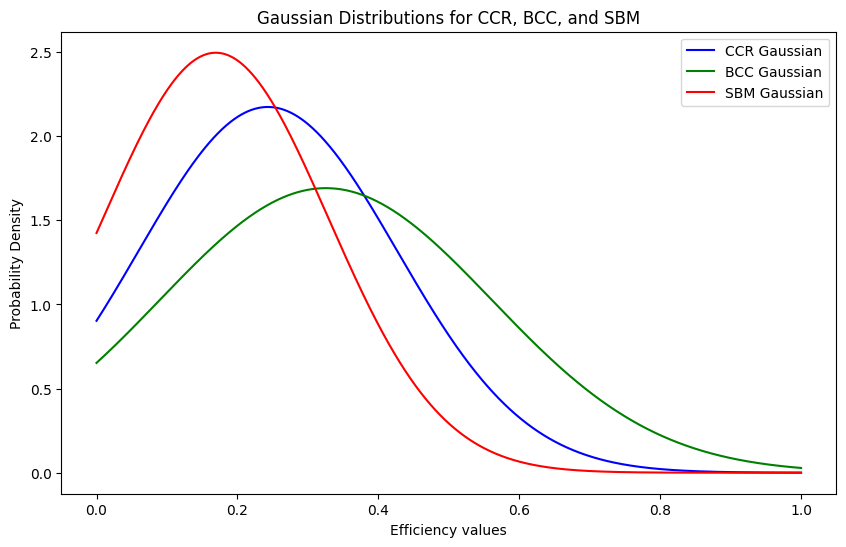

In [55]:
x = np.linspace(0, 1, 1000)
ccr_pdf = norm.pdf(x, ccr_mean, ccr_std)
bcc_pdf = norm.pdf(x, bcc_mean, bcc_std)
sbm_pdf = norm.pdf(x, sbm_mean, sbm_std)

plt.figure(figsize=(10, 6))
plt.plot(x, ccr_pdf, label='CCR Gaussian', color='blue')
plt.plot(x, bcc_pdf, label='BCC Gaussian', color='green')
plt.plot(x, sbm_pdf, label='SBM Gaussian', color='red')

plt.legend()
plt.title('Gaussian Distributions for CCR, BCC, and SBM')
plt.xlabel('Efficiency values')
plt.ylabel('Probability Density')